In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.svm import SVC
import sklearn.metrics as metrs 
import os
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# データ読み込み
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submit = pd.read_csv('sample_submit.csv')

In [3]:
# def change_train(df_train[x]):
#     if df_train[x]['blueEliteMonsters'] == 2:
#         return df_train[x]['blueTotalExperience'] + 1000
#     elif df_train[x]['blueEliteMonsters'] == 1:
#         return df_train[x]['blueTotalExperience'] + 500
#     elif df_train[x]['blueEliteMonsters'] == 0:
#         return df_train[x]['blueTotalExperience'] + 100
    

# df_train['change_train'] = df_train[x]['blueTotalExperience'].apply(change_train)    

In [4]:
# df_train[df_train['blueEliteMonsters'] == 1 ]

In [5]:
df_train['Gold_ret'] = (df_train["blueTotalGold"]//1000+1).astype(int)
df_train['Experience_ret'] = (df_train["blueTotalExperience"]//1000+1).astype(int)

df_test['Gold_ret'] = (df_test["blueTotalGold"]//1000+1).astype(int)
df_test['Experience_ret'] = (df_test["blueTotalExperience"]//1000+1).astype(int)

In [6]:
df_train['blue_kill_assist'] = df_train['blueKills'] + df_train['blueAssists']
df_test['blue_kill_assist'] = df_test['blueKills'] + df_test['blueAssists']

In [7]:
df_train = df_train[(df_train['blueTotalExperience'] >= 17000) & (df_train['blueTotalExperience'] <= 20100)]

In [8]:
df_train = df_train[df_train['blueAssists'] < 17]

In [9]:
df_train = pd.get_dummies(df_train, columns=['blueEliteMonsters'])
df_train = pd.get_dummies(df_train, columns=['blueFirstBlood'])

In [10]:
df_test = pd.get_dummies(df_test, columns=['blueEliteMonsters'])
df_test = pd.get_dummies(df_test, columns=['blueFirstBlood'])

In [11]:
df_train['TotalGold/TotalExperience'] = df_train['blueTotalGold'] / df_train['blueTotalExperience']

In [12]:
df_test['TotalGold/TotalExperience'] = df_test['blueTotalGold'] / df_test['blueTotalExperience']

In [13]:
df_train['TotalExperience/TotalGold'] = df_train['blueTotalExperience'] / df_train['blueTotalGold']

In [14]:
df_test['TotalExperience/TotalGold'] = df_test['blueTotalExperience'] / df_test['blueTotalGold']

In [15]:
mm = MinMaxScaler([0,1])
ss = StandardScaler()

In [16]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()

In [17]:
# select_columns = ['blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'Gold_ret', 'Experience_ret', 'blue_kill_assist', 'blueEliteMonsters_0', 'blueEliteMonsters_1', 'blueEliteMonsters_2', 'blueFirstBlood_0', 'blueFirstBlood_1', 'TotalGold/TotalExperience', 'TotalExperience/TotalGold']
# df_train[select_columns]

In [18]:
# df_train[select_columns] = ss.fit_transform(df_train[select_columns])
# df_train[select_columns].describe()

In [19]:
df_train.describe()

,gameId,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,blueWins,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,blueEliteMonsters_1,blueEliteMonsters_2,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold
count,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000
mean,4985.488355,6.029802,5.923491,5.881167,0.358502,17154.326196,17985.189081,0.491986,17.670173,18.681568,11.910969,0.534936,0.391059,0.074005,0.486602,0.513398,0.954775,1.060463
std,2893.429054,2.622787,2.648099,3.188313,0.479591,1817.620671,770.907872,0.499967,1.862097,0.715271,5.377353,0.498809,0.488018,0.261795,0.499852,0.499852,0.102218,0.123613
min,0.000000,0.000000,0.000000,0.000000,0.000000,13475.000000,17119.000000,0.000000,14.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673615,0.830254
25%,2474.250000,4.000000,4.000000,3.000000,0.000000,16544.000000,17256.000000,0.000000,17.000000,18.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870554,0.991211
50%,4987.500000,6.000000,6.000000,6.000000,0.000000,17409.000000,18021.000000,0.000000,18.000000,19.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.989281,1.010835
75%,7495.750000,8.000000,8.000000,8.000000,1.000000,18274.000000,18472.000000,1.000000,19.000000,19.000000,16.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.008866,1.148694
max,9998.000000,14.000000,14.000000,14.000000,1.000000,20619.000000,20004.000000,1.000000,21.000000,21.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.204451,1.484527


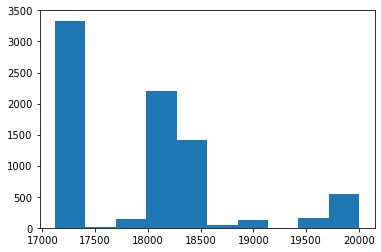

In [20]:
plt.hist(df_train['blueTotalExperience'])
plt.show()

In [21]:
def change_blueTotalExperience(x):
    if x < 17500:
        return 1
    elif 17500 <= x < 19000:
        return 2
    elif 19000 <= x:
        return 3

df_train['change_blueTotalExperience'] = df_train['blueTotalExperience'].apply(change_blueTotalExperience)

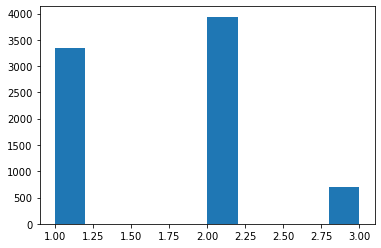

In [22]:
plt.hist(df_train['change_blueTotalExperience'])
plt.show()

In [23]:
def change_blueTotalExperience(x):
    if x < 17500:
        return 1
    elif 17500 <= x < 19000:
        return 2
    elif 19000 <= x:
        return 3

df_test['change_blueTotalExperience'] = df_test['blueTotalExperience'].apply(change_blueTotalExperience)

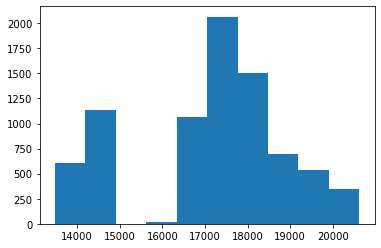

In [24]:
plt.hist(df_train['blueTotalGold'])
plt.show()

In [25]:
def change_blueTotalGold(x):
    if x < 17000:
        return 1
    elif 17000 <= x < 18500:
        return 2
    elif 18500 <= x:
        return 3

df_train['change_blueTotalGold'] = df_train['blueTotalGold'].apply(change_blueTotalGold)

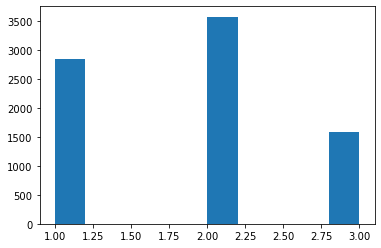

In [26]:
plt.hist(df_train['change_blueTotalGold'])
plt.show()

In [27]:
def change_blueTotalGold(x):
    if x < 17000:
        return 1
    elif 17000 <= x < 18500:
        return 2
    elif 18500 <= x:
        return 3

df_test['change_blueTotalGold'] = df_test['blueTotalGold'].apply(change_blueTotalGold)

In [28]:
df_train

,gameId,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,blueWins,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,blueEliteMonsters_1,blueEliteMonsters_2,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience,change_blueTotalGold
0,0,5,8,6,0,14536,17256,0,15,18,11,1,0,0,1,0,0.842374,1.187122,1,1
1,1,10,1,5,0,14536,17863,0,15,18,15,1,0,0,0,1,0.813749,1.228880,2,1
2,2,3,10,2,0,17409,17256,0,18,18,5,1,0,0,1,0,1.008866,0.991211,1,2
3,3,7,10,8,0,19558,18201,0,20,19,15,1,0,0,0,1,1.074556,0.930617,2,3
4,4,4,9,4,0,17409,17256,0,18,18,8,1,0,0,1,0,1.008866,0.991211,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9993,9,6,14,0,18513,18201,1,19,19,23,1,0,0,0,1,1.017142,0.983147,2,3
7996,9994,3,10,4,0,17381,19797,0,18,20,7,1,0,0,1,0,0.877961,1.139002,3,2
7997,9995,9,3,9,1,18274,18491,1,19,19,18,0,0,1,0,1,0.988265,1.011875,2,2
7998,9997,5,10,6,1,18274,18491,1,19,19,11,0,1,0,1,0,0.988265,1.011875,2,2


In [29]:
df_train = pd.get_dummies(df_train, columns=['change_blueTotalExperience'])
df_train = pd.get_dummies(df_train, columns=['change_blueTotalGold'])

In [30]:
df_train

,gameId,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,blueWins,Gold_ret,Experience_ret,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
0,0,5,8,6,0,14536,17256,0,15,18,...,1,0,0.842374,1.187122,1,0,0,1,0,0
1,1,10,1,5,0,14536,17863,0,15,18,...,0,1,0.813749,1.228880,0,1,0,1,0,0
2,2,3,10,2,0,17409,17256,0,18,18,...,1,0,1.008866,0.991211,1,0,0,0,1,0
3,3,7,10,8,0,19558,18201,0,20,19,...,0,1,1.074556,0.930617,0,1,0,0,0,1
4,4,4,9,4,0,17409,17256,0,18,18,...,1,0,1.008866,0.991211,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9993,9,6,14,0,18513,18201,1,19,19,...,0,1,1.017142,0.983147,0,1,0,0,0,1
7996,9994,3,10,4,0,17381,19797,0,18,20,...,1,0,0.877961,1.139002,0,0,1,0,1,0
7997,9995,9,3,9,1,18274,18491,1,19,19,...,0,1,0.988265,1.011875,0,1,0,0,1,0
7998,9997,5,10,6,1,18274,18491,1,19,19,...,1,0,0.988265,1.011875,0,1,0,0,1,0


In [31]:
df_test = pd.get_dummies(df_test, columns=['change_blueTotalExperience'])
df_test = pd.get_dummies(df_test, columns=['change_blueTotalGold'])

In [32]:
df_test

,gameId,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,Gold_ret,Experience_ret,blue_kill_assist,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
0,9,7,6,6,0,16961,18201,17,19,13,...,1,0,0.931872,1.073109,0,1,0,1,0,0
1,15,6,6,6,1,18513,18021,19,19,12,...,1,0,1.027301,0.973424,0,1,0,0,0,1
2,18,6,4,3,0,13475,17256,14,18,9,...,0,1,0.780888,1.280594,1,0,0,1,0,0
3,23,5,4,7,0,17409,17256,18,18,12,...,1,0,1.008866,0.991211,1,0,0,0,1,0
4,31,10,8,9,0,18117,18472,19,19,19,...,1,0,0.980782,1.019595,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9971,6,3,7,0,17409,17256,18,18,13,...,1,0,1.008866,0.991211,1,0,0,0,1,0
1996,9980,4,4,4,0,17409,17256,18,18,8,...,1,0,1.008866,0.991211,1,0,0,0,1,0
1997,9983,6,3,3,1,18513,18201,19,19,9,...,0,1,1.017142,0.983147,0,1,0,0,0,1
1998,9996,10,9,9,1,18513,18201,19,19,19,...,0,1,1.017142,0.983147,0,1,0,0,0,1


In [33]:
select_columns = ['blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueTotalGold', 'blueTotalExperience', 'Gold_ret', 'Experience_ret', 'blue_kill_assist', 'blueEliteMonsters_0', 'blueEliteMonsters_1', 'blueEliteMonsters_2', 'blueFirstBlood_0', 'blueFirstBlood_1', 'TotalGold/TotalExperience', 'TotalExperience/TotalGold', 'change_blueTotalExperience_1', 'change_blueTotalExperience_2', 'change_blueTotalExperience_3', 'change_blueTotalGold_1', 'change_blueTotalGold_2', 'change_blueTotalGold_3']
df_train[select_columns]

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
0,5,8,6,0,14536,17256,15,18,11,1,...,1,0,0.842374,1.187122,1,0,0,1,0,0
1,10,1,5,0,14536,17863,15,18,15,1,...,0,1,0.813749,1.228880,0,1,0,1,0,0
2,3,10,2,0,17409,17256,18,18,5,1,...,1,0,1.008866,0.991211,1,0,0,0,1,0
3,7,10,8,0,19558,18201,20,19,15,1,...,0,1,1.074556,0.930617,0,1,0,0,0,1
4,4,9,4,0,17409,17256,18,18,8,1,...,1,0,1.008866,0.991211,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9,6,14,0,18513,18201,19,19,23,1,...,0,1,1.017142,0.983147,0,1,0,0,0,1
7996,3,10,4,0,17381,19797,18,20,7,1,...,1,0,0.877961,1.139002,0,0,1,0,1,0
7997,9,3,9,1,18274,18491,19,19,18,0,...,0,1,0.988265,1.011875,0,1,0,0,1,0
7998,5,10,6,1,18274,18491,19,19,11,0,...,1,0,0.988265,1.011875,0,1,0,0,1,0


In [34]:
df_train[select_columns] = ss.fit_transform(df_train[select_columns])
df_train[select_columns].describe()

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
count,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,...,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03,7.986000e+03
mean,-1.781634e-16,-1.371722e-16,-3.818564e-16,-3.593697e-16,4.123368e-17,6.583347e-16,4.387230e-16,2.702724e-15,4.433385e-17,3.617331e-17,...,8.019853e-16,-7.623365e-16,3.581185e-17,-2.951697e-16,2.562716e-16,6.005019e-16,-2.388523e-16,6.864865e-17,5.488556e-17,-4.357618e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-2.299150e+00,-2.237024e+00,-1.844717e+00,-7.475642e-01,-2.024381e+00,-1.123666e+00,-1.971112e+00,-9.529401e-01,-2.215163e+00,-1.072494e+00,...,-9.735527e-01,-1.027166e+00,-2.750772e+00,-1.862454e+00,-8.476604e-01,-9.865666e-01,-3.118966e-01,-7.422808e-01,-8.993517e-01,-4.962405e-01
25%,-7.739589e-01,-7.264122e-01,-9.037217e-01,-7.475642e-01,-3.358041e-01,-9.459428e-01,-3.599247e-01,-9.529401e-01,-7.273493e-01,-1.072494e+00,...,-9.735527e-01,-1.027166e+00,-8.239918e-01,-5.602626e-01,-8.476604e-01,-9.865666e-01,-3.118966e-01,-7.422808e-01,-8.993517e-01,-4.962405e-01
50%,-1.136349e-02,2.889381e-02,3.727376e-02,-7.475642e-01,1.401226e-01,4.645583e-02,1.771378e-01,4.452189e-01,1.655766e-02,9.324066e-01,...,-9.735527e-01,9.735527e-01,3.375958e-01,-4.015022e-01,-8.476604e-01,-9.865666e-01,-3.118966e-01,-7.422808e-01,-8.993517e-01,-4.962405e-01
75%,7.512319e-01,7.841998e-01,6.646041e-01,1.337678e+00,6.160493e-01,6.315170e-01,7.142004e-01,4.452189e-01,7.604646e-01,9.324066e-01,...,1.027166e+00,9.735527e-01,5.292128e-01,7.138138e-01,1.179718e+00,1.013616e+00,-3.118966e-01,1.347199e+00,1.111912e+00,-4.962405e-01
max,3.039018e+00,3.050118e+00,2.546595e+00,1.337678e+00,1.906278e+00,2.618909e+00,1.788325e+00,3.241537e+00,2.806209e+00,9.324066e-01,...,1.027166e+00,9.735527e-01,2.442748e+00,3.430791e+00,1.179718e+00,1.013616e+00,3.206191e+00,1.347199e+00,1.111912e+00,2.015152e+00


In [35]:
df_test[select_columns] = ss.fit_transform(df_test[select_columns])
df_test[select_columns].describe()

,blueKills,blueDeaths,blueAssists,blueDragons,blueTotalGold,blueTotalExperience,Gold_ret,Experience_ret,blue_kill_assist,blueEliteMonsters_0,...,blueFirstBlood_0,blueFirstBlood_1,TotalGold/TotalExperience,TotalExperience/TotalGold,change_blueTotalExperience_1,change_blueTotalExperience_2,change_blueTotalExperience_3,change_blueTotalGold_1,change_blueTotalGold_2,change_blueTotalGold_3
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-5.034861e-17,-6.894485e-17,3.913536e-17,8.815171e-17,-5.528911e-16,2.295386e-15,-2.929879e-16,1.004863e-15,-4.388157e-17,-2.507439e-16,...,3.177458e-16,-2.851053e-16,2.877698e-16,-5.708489e-16,-1.432188e-17,-1.366685e-16,1.548761e-17,-3.880229e-16,-3.048672e-16,9.209300e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-2.335133e+00,-2.219623e+00,-1.889343e+00,-7.491864e-01,-2.012039e+00,-1.761000e+00,-1.961094e+00,-2.351004e+00,-2.244429e+00,-1.045012e+00,...,-9.540543e-01,-1.048158e+00,-2.709700e+00,-1.790495e+00,-8.173474e-01,-1.017147e+00,-3.164017e-01,-7.249504e-01,-8.909108e-01,-5.202384e-01
25%,-8.305369e-01,-7.103170e-01,-6.650807e-01,-7.491864e-01,-1.179559e-01,-9.722646e-01,-3.701579e-01,-9.729245e-01,-7.941882e-01,-1.045012e+00,...,-9.540543e-01,-1.048158e+00,-8.147353e-01,-5.453612e-01,-8.173474e-01,-1.017147e+00,-3.164017e-01,-7.249504e-01,-8.909108e-01,-5.202384e-01
50%,-7.823898e-02,4.433585e-02,-5.294936e-02,-7.491864e-01,1.254605e-01,2.341607e-02,1.601543e-01,4.051555e-01,-6.906772e-02,9.569268e-01,...,-9.540543e-01,9.540543e-01,3.276715e-01,-3.910463e-01,-8.173474e-01,9.831421e-01,-3.164017e-01,-7.249504e-01,-8.909108e-01,-5.202384e-01
75%,6.740589e-01,7.989887e-01,5.591820e-01,1.334781e+00,5.954496e-01,6.104121e-01,6.904664e-01,4.051555e-01,6.560527e-01,9.569268e-01,...,1.048158e+00,9.540543e-01,5.161244e-01,6.930394e-01,1.223470e+00,9.831421e-01,-3.164017e-01,1.379405e+00,1.122447e+00,-5.202384e-01
max,2.554804e+00,3.062947e+00,2.395576e+00,1.334781e+00,1.869582e+00,2.730626e+00,1.751091e+00,3.161315e+00,2.650134e+00,9.569268e-01,...,1.048158e+00,9.540543e-01,2.361620e+00,3.333938e+00,1.223470e+00,9.831421e-01,3.160540e+00,1.379405e+00,1.122447e+00,1.922196e+00


In [50]:
X = df_train[select_columns]
y = df_train['blueWins']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [52]:
# RandomizedSearchCV クラスのインポート
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# 学習に使用するアルゴリズム
estimator = RandomForestClassifier(random_state=0)

In [54]:
# ハイパーパラメータを探索する範囲の指定
param_distributions = {
    'max_depth': list(range(35, 55, 1)),
    'min_samples_split': list(range(20, 40, 1)),
    'min_samples_leaf': list(range(1, 10, 1)),
    'n_estimators': list(range(130, 160, 1)),
}

In [55]:
# 試行回数の指定
n_iter = 200
cv = 5

In [56]:
tuned_model = RandomizedSearchCV(
    estimator=estimator, 
    param_distributions=param_distributions, 
    n_iter=n_iter, cv=cv, 
    random_state=0, return_train_score=False
)

In [57]:
tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=200,
                   param_distributions={'max_depth': [35, 36, 37, 38, 39, 40,
                                                      41, 42, 43, 44, 45, 46,
                                                      47, 48, 49, 50, 51, 52,
                                                      53, 54],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, 31,
                                                              32, 33, 34, 35,
                                                              36, 37, 38, 39],
                                        'n_estimators': 

In [58]:
best_param = tuned_model.best_params_
best_param

{'n_estimators': 149,
 'min_samples_split': 36,
 'min_samples_leaf': 5,
 'max_depth': 47}

In [59]:
best_model = tuned_model.best_estimator_

In [60]:
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(0.8173410404624277, 0.7829041487839771)

In [61]:
forest = RandomForestClassifier(random_state=0, **best_param).fit(X_train, y_train)

In [62]:
from sklearn.metrics import confusion_matrix
Y_pred_rf = forest.predict(X_test)
confusion_matrix(y_test, Y_pred_rf)

array([[1114,  317],
       [ 290, 1075]])

Important features
____________________________________________________________
81.73


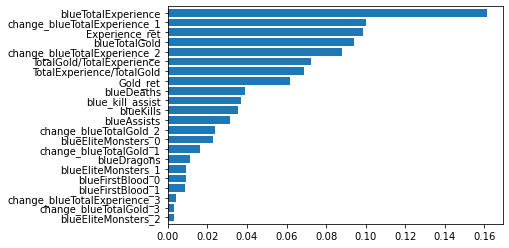

In [63]:
acc_random_forest = round(forest.score(X_train, y_train) * 100, 2)

print("Important features")
pd.Series(forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [64]:
pred = forest.predict(df_test[select_columns])

In [69]:
# sub = pd.read_csv('sample_submit.csv',names=('id','pred'))
# sub['pred'] = pred
# sub.to_csv('sub_20210130_1.csv',index=False,header=None)